In [1]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/digit_train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
img0 = data.iloc[0, 1:]
img0.values

In [17]:
# 리스트 자료형을 28*28 형태로 변환
img0_reshape = img0.values.reshape(28, 28)

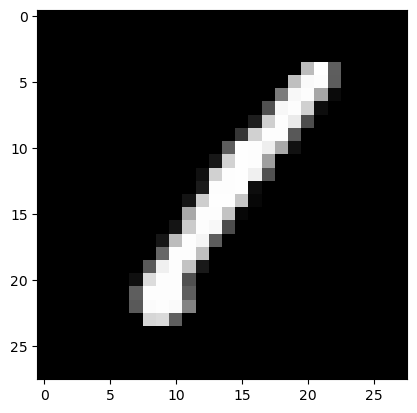

In [18]:
plt.imshow(img0_reshape, cmap='gray')
plt.show()

In [26]:
# 데이터 분리
X = data.iloc[:, 1:] # data.drop('label', axis = 1)
y = data.iloc[:, 0] # data['label]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29400, 784) (12600, 784) (29400,) (12600,)


### 모델 선정 및 학습
- knn
- logistic Regression
- SVM

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [30]:
# 모델 생성
knn_model = KNeighborsClassifier()
logi_model = LogisticRegression()
svm_model = LinearSVC()

### 5. 학습 및 평가

In [31]:
knn_model.fit(X_train, y_train)
logi_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

c:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinearSVC()

In [32]:
print('knn : ', knn_model.score(X_train, y_train))
print('logi : ', logi_model.score(X_train, y_train))
print('svm : ', svm_model.score(X_train, y_train))

knn :  0.9767006802721089
logi :  0.9420748299319728
svm :  0.9400340136054421


In [33]:
print('knn : ', knn_model.score(X_test, y_test))
print('logi : ', logi_model.score(X_test, y_test))
print('svm : ', svm_model.score(X_test, y_test))

knn :  0.9650793650793651
logi :  0.9147619047619048
svm :  0.9061111111111111


## 예측

In [36]:
img35814 = X_train.loc[35814]

In [37]:
logi_model.predict([img35814])

c:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [38]:
svm_model.predict([img35814])ignore

c:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [39]:
knn_model.predict([img35814])

c:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [40]:
y_train.loc[35814]

4

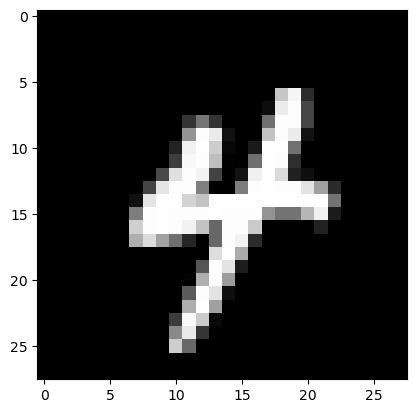

In [56]:
plt.imshow(img35814.values.reshape(28, 28), cmap='gray')
plt.show()